In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parsasam/captcha-dataset")

print("Path to dataset files:", path)

100%|██████████| 356M/356M [00:05<00:00, 67.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/parsasam/captcha-dataset/versions/1


['sh2Ig', 'GcurJ', 'tV8iH', '91QzU', 'e979g', 'qfXxR', '9qmSl', 'hDHK4', 'dnMOY', 'yKi7K', 'yebQ2', 'ZmWfG', 'L3Hwh', '5QcpI', '5Xb4Z', 'UzPFQ', 'w9dsE', 'LesZm', 'UnFm6', 'pVvLL', 'L3DPX', 'cbLPC', '71wBL', 'PrM91', 'nBtLU']


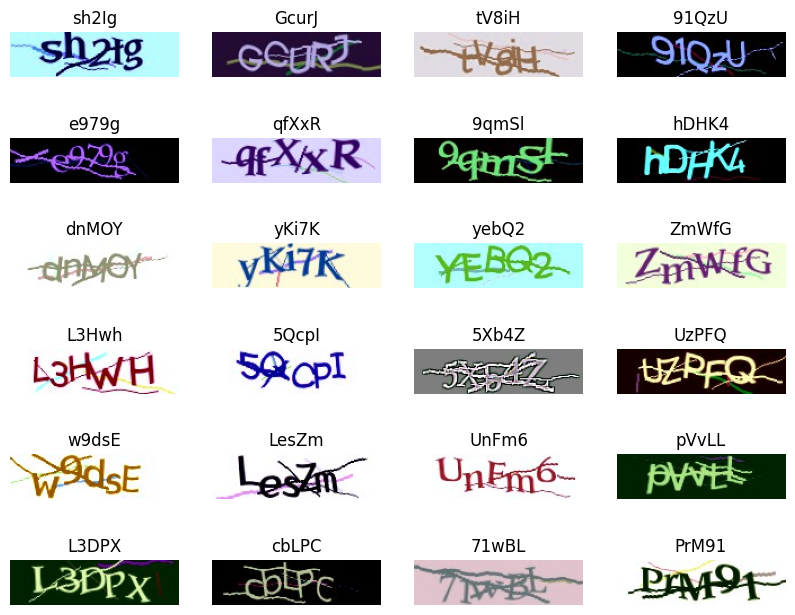

In [2]:
import cv2
import matplotlib.pyplot as plt
import glob
loaded_images = []
image_labels = []


# load images
for i, filename in enumerate(glob.glob(f'{path}/*.jpg')):
  loaded_images.append(cv2.imread(filename))
  image_labels.append(filename.split('/')[-1].split('.')[0])
  if i==24:
    break

print(image_labels)
fig, axes = plt.subplots(6, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(loaded_images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')

In [3]:
print(loaded_images[0].shape)
size = loaded_images[0].shape[0] * loaded_images[0].shape[1]
print(f"size: {size}")

(40, 150, 3)
size: 6000


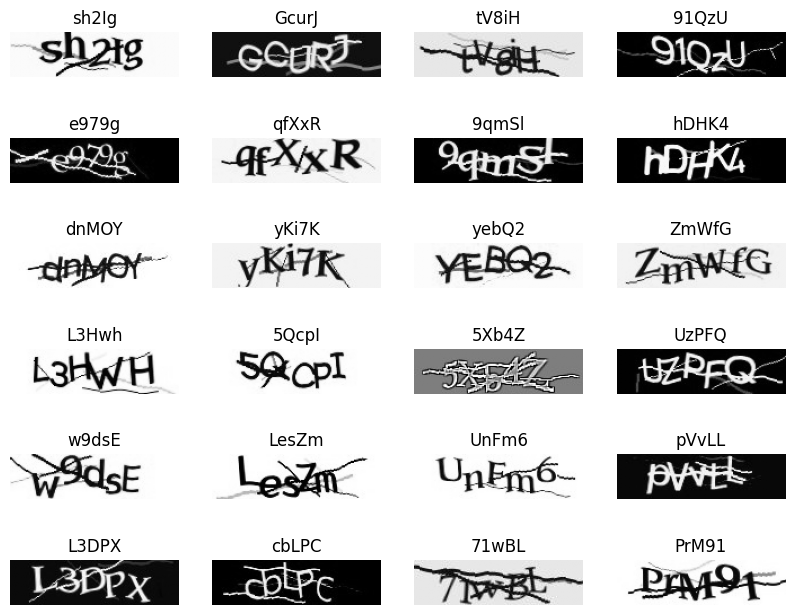

In [4]:
images = []
for image in loaded_images:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  images.append(image)

fig, axes = plt.subplots(6, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')

[(np.uint8(255), 5387), (np.uint8(0), 613)]
[(np.uint8(0), 3998), (np.uint8(255), 2002)]
[(np.uint8(255), 5425), (np.uint8(0), 575)]
[(np.uint8(0), 4630), (np.uint8(255), 1370)]
[(np.uint8(0), 4790), (np.uint8(255), 1210)]
[(np.uint8(255), 5298), (np.uint8(0), 702)]
[(np.uint8(0), 4199), (np.uint8(255), 1801)]
[(np.uint8(0), 4558), (np.uint8(255), 1442)]
[(np.uint8(255), 5325), (np.uint8(0), 675)]
[(np.uint8(255), 5622), (np.uint8(0), 378)]
[(np.uint8(255), 5285), (np.uint8(0), 715)]
[(np.uint8(255), 5560), (np.uint8(0), 440)]
[(np.uint8(255), 5361), (np.uint8(0), 639)]
[(np.uint8(255), 5414), (np.uint8(0), 586)]
[(np.uint8(0), 3801), (np.uint8(255), 2199)]
[(np.uint8(0), 4234), (np.uint8(255), 1766)]
[(np.uint8(255), 5399), (np.uint8(0), 601)]
[(np.uint8(255), 5208), (np.uint8(0), 792)]
[(np.uint8(255), 5614), (np.uint8(0), 386)]
[(np.uint8(0), 4572), (np.uint8(255), 1428)]
[(np.uint8(0), 4366), (np.uint8(255), 1634)]
[(np.uint8(0), 4917), (np.uint8(255), 1083)]
[(np.uint8(255), 5270)

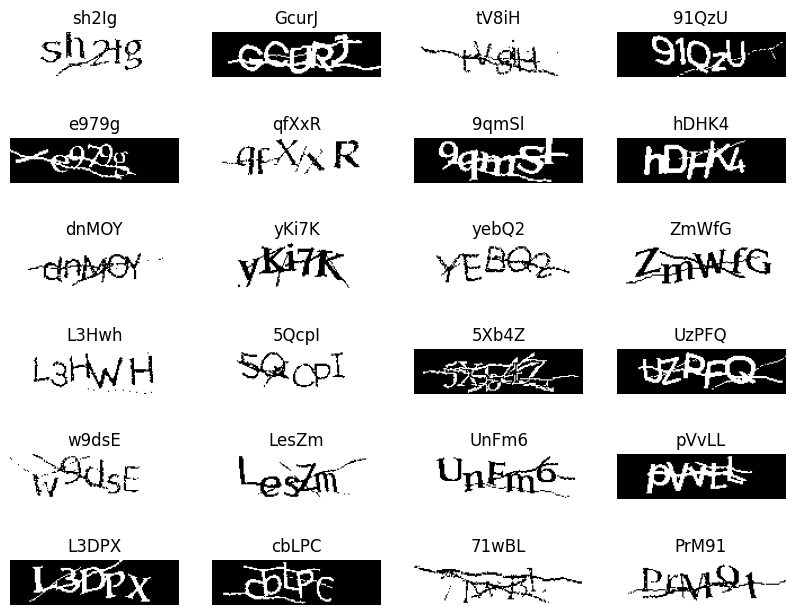

In [5]:
from collections import Counter

reduced_images = []
for image in loaded_images:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  common = []
  RANGE=25
  for i in range(RANGE):
    common.append(Counter(image.flatten()).most_common(RANGE+1)[i][0])


  temp = image.copy()
  for i, row in enumerate(temp):
    for j, pixel in enumerate(row):
      if pixel in common:
        # temp[i][j] = 0   # keep
        pass
      else:
        temp[i][j] = 255 # discard


  ret,temp = cv2.threshold(temp, 0, 255, cv2.THRESH_OTSU)
  print(Counter(temp.flatten()).most_common(2))

  # limit if too much or too little is filtered out
  if Counter(temp.flatten()).most_common(2)[1][1] < 500 or Counter(temp.flatten()).most_common(2)[1][1] > 1000:
    ret,image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
    reduced_images.append(image)
  else:
    reduced_images.append(temp)


fig, axes = plt.subplots(6, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(reduced_images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')

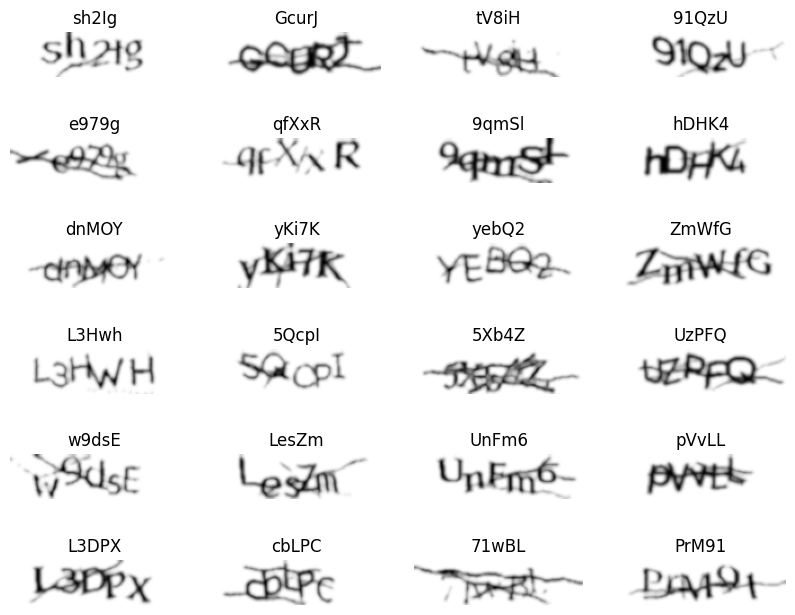

In [9]:
import numpy as np

# Process
images = []
for image in reduced_images:
  # FIXME TODO comment out Color and OTSU for reduced_images
  # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # ret,image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

  # if the background is black, invert it
  if image[0][0] == 0:
    image = cv2.bitwise_not(image)

  # all non-white pixels are now black
  for i, row in enumerate(image):
    for j, pixel in enumerate(row):
      if pixel != 255:
        image[i][j] = 0


  # FIXME TODO Try removing GaussianBlur and Dilate when training
  image = cv2.GaussianBlur(image, (7,7), 0)

  # Creating kernel
  kernel = np.ones((2, 2), np.uint8)

  image = cv2.dilate(image, kernel, cv2.BORDER_REFLECT)

  images.append(image)


# output and graph
fig, axes = plt.subplots(6, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(images[i], cmap='gray')
  ax.set_title(image_labels[i])
  ax.axis('off')